# Amore - CHANEL

## 1. Inspecting and understanding the data

Because of the nature of the data (few numerical /continuous variables) - Initial quality control and inspecting in Excel.
After we can proceed in Pandas.

In [127]:
# reading in the previously generated data in pandas
df = pd.read_csv('AmoreChanel_alldata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 12 columns):
prname               2011 non-null object
page2                2011 non-null object
price                2011 non-null int64
authnumber           1834 non-null object
sizeInch             2011 non-null object
color_material       2011 non-null object
accessories          2011 non-null object
outside_condition    2011 non-null object
inside_condition     2007 non-null object
other                1673 non-null object
smell                1965 non-null object
product_nr           2011 non-null object
dtypes: int64(1), object(11)
memory usage: 188.7+ KB


In [128]:
df.head(6)

,prname,page2,price,authnumber,sizeInch,color_material,accessories,outside_condition,inside_condition,other,smell,product_nr
0,CHANEL Quilted CC Chain Shoulder Bag BK Caviar...,/collections/chanel/products/ao00006,298000,3067681,"W 12 x H 10.0 x D 3.0 ""\n\nStrap Drop. 20.9 """,Black / Caviar Skin Leather,"Authenticity Seal, Authenticity Card, Dust Bag...","There is a Scuff, good condition","There is a Wrinkle, Dirt, use",-,-,AO00006
1,CHANEL Quilted Chain 2way Hand Bag Beige,/collections/chanel/products/ao23462,328000,1210147,"W 7.7 x H 5.9 x D 2.2 ""\n\nHandle Drop. 1.2 ""\...",Beige/ Leather,"Authenticity Seal, Authenticity Card, Shoulder...",Good Condition,Good Condition,-,-,AO23462
2,CHANEL Quilted Chain Belt Attachment Pouch Black,/collections/chanel/products/ao23074,228000,NaN,"W 3.5 x H 3.1 x D 1.6 ""\r\n\r\nStrap Drop : 3.5 """,Black/ Leather,Box,Good Condition,There is sign of use overall\r\n\r\nEdge: Mino...,-,-,AO23074
3,CHANEL Quilted Cosmetic Vanity Hand Bag Black,/collections/chanel/products/ao21157,98000,4268626,"W 5.9 x H 6.7 x D 4.7 ""\r\n\r\nHandle Drop. 1.2 """,Black/ Leather,"Authenticity Seal, Dust Bag, Box",Excellent Condition\r\n\r\nScratches,Excellent Condition,-,-,AO21157
4,CHANEL Mademoiselle Classic Flap Mini Square S...,/collections/chanel/products/ao11085,698000,2838869,"W 6.7 x H 5.5 x D 2.4 ""\r\nStrap Drop. 20.1 """,Red\r\n/ Caviar Skin Leather,Authenticity Seal,"Though there is a little feeling of used, good...",Though there is a little feeling of used,-,-,AO11085
5,CHANEL Quilted Fringe Chain Shoulder Bag Black,/collections/chanel/products/ao09352,298000,2560690,"W 10.6 x H 7.9 x D 2.8 ""\r\n\r\nShoulder Drop....",Black\r\n/ Caviar Skin,Authenticity Seal,There is sign of used overall.\r\n\r\nLeather ...,Though there is a little feeling of used and m...,-,Smell of perfume.,AO09352


Conclusions from initial inspection: apart from price, all other columns contain object-type variables, will need transformation to be useful for further analysis. severall columns have missing data points, we will have to deal with that too

## 2. Data wrangling

After inspecting and understanding the data we know how to transform and map the data from its "raw" form into another format which will be more appropriate and valuable for analytical purposes. 

we will be using the following game plan:

1) *price* column: values are currently in JYP / Japan Yen, we'll convert this column to USD to better understand the values

2) *authnumber* : this is the authenticity code of each item which is unique for each item but also contains the year or production. We will decode each number according to CHANEL's system, see https://www.yoogiscloset.com/authenticate/chanel

3) the column *authnumber* has some missing values, since this is only a smaller portion of the dataset, we will be dropping the rows with missing *authnumber*

4) I will encode the *sizeInch* column and use this information to subdivide each bag into the following size categories: mini - small - medium - large -Xlarge

5) *color_material* contains both the color and the material of each item. we will seperate these two out and create a new column for each (can later be encoded)

6) the *accessories* column tells us which of the original accessories come with the bag. These accessories are: authenticity seal, authenticity card, dust bag, box and manual. I will encode this column: for each item present +1 is added to a base score of 0 (=no accessories inlcuded.

7) The column *outside_condition* and *inside_condition* both contain a lot of text. Using the information in these columns I will assign one of the following conditions to each item, both for interior and exterior seperately: Excellent condition - Good condition - Used condition 

8) The *other* column is empty for most items, but if present it contains information on defects that the bag has (rips, tears, discoloration etc.). Since this is still useful I will encode this column: 0 when empty, and 1 when containing a details on some kind of defect.

9) *smell* can be handled in the same way as *other*, if the *smell* value is empty it means the bag doesn't have a noticable bad smell (score 0), if not there is some sort of smell such as mold or cigarette smoke (score 1) 

10) *product_nr* does not contain any useful info and can be deleted

11) *page2* contains the weblink to each produch item's product page and can also be deleted at this point

12) from the *prname* column I can extract a number or interesting features. CHANEL bags have some characteristics which make them stand out in comparison to other brands: Quilted leather, a leather interlaced chain-link strap and the interlocking double C logo. we can extract the presents and absence of each of these features in each item from the *prname* column. I will create 3 new columns each binary encoded: *has_chain*, *has_logo*, *has_quilts*.

13) Another interesting feature which can be extracted from the the *prname* column is the bag style: Tote bag, Backpack, Clutch, etc.

14) After all interesting info is extracted from *prname* we will also delete this column

Note that after these transformations we will have only one column with **continuous (numerical) data**: *price*, our response variable. The other columns will contain both **numerical discrete data** (such as number of accessoiries) and **categorical variables** (both nominal and ordinal). When building a prediction model later on, the latter type will need to be further encoded.

In [129]:
#1) convert price JYP to USD 
df.price = df.price.apply(lambda x: int(x*0.0093))


#3) drop missing values of authnumber 
df = df[df['authnumber'].notna()]


#2) convert the authenticity numbers to their year of production - using buckets here
def authnumber_convert(row):
    row.authnumber = str(row.authnumber)
    if len(row.authnumber) == 6 or len(row.authnumber) == 7 and row.authnumber[0] == '0' or len(row.authnumber) == 7 and row.authnumber[0] == '1':
        return '1985-1990'
    elif len(row.authnumber) == 7 and row.authnumber[0] == '2' or len(row.authnumber) == 7 and row.authnumber[0] == '3': 
        return '1990-1995'
    elif len(row.authnumber) == 7 and row.authnumber[0] == '4' or len(row.authnumber) == 7 and row.authnumber[0] == '5': 
        return '1995-1999'        
    elif len(row.authnumber) == 7 and row.authnumber[0] == '6' or len(row.authnumber) == 7 and row.authnumber[0] == '7'or len(row.authnumber) == 7 and row.authnumber[0] == '8': 
        return '2000-2004'        
    else:
        return '2005-2010' 
   
df['production_year'] = df.apply(authnumber_convert,axis='columns')
df.drop(['authnumber'], axis=1, inplace=True)


#4) convert sizeInch to size classes
def get_size(row):
    row.sizeInch = row.sizeInch[2:6]
    if 'x' in row.sizeInch:
        row.sizeInch = row.sizeInch.strip('x').replace('','') 
    row.sizeInch = float(row.sizeInch)
    if row.sizeInch <5:
        return "mini"
    elif row.sizeInch <10:
        return "small"
    elif row.sizeInch <12:
        return "medium"    
    elif row.sizeInch <15:
        return "large"  
    else:
        return "xlarge"
   
df['size'] = df.apply(get_size,axis='columns')
df.drop(['sizeInch'], axis=1, inplace=True)


#5.1) Create a color column and extract info from color_material
def get_color(row):
    if 'Black' in row.color_material:
        return "Black"
    elif 'Beige' in row.color_material or 'Cream' in row.color_material:
        return "Beige"
    elif 'Brown' in row.color_material:
        return "Brown"
    elif 'Blue' in row.color_material or 'Navy' in row.color_material or 'Indigo' in row.color_material:
        return "Blue"  
    elif 'Red' in row.color_material or 'Bordeaux' in row.color_material or 'Cherry' in row.color_material or 'Burgundy' in row.color_material:
        return "Red" 
    elif 'Yellow' in row.color_material:
        return "Yellow"
    elif 'Pink' in row.color_material:
        return "Pink"    
    elif 'Gold' in row.color_material or 'Silver' in row.color_material or 'Bronze' in row.color_material:
        return "Metallic"
    elif 'Orange' in row.color_material:
        return "Orange"
    elif 'Purple' in row.color_material or 'Violet' in row.color_material:
        return "Purple"   
    elif 'White' in row.color_material or 'Ivory' in row.color_material:
        return "White"    
    elif 'Gray' in row.color_material:
        return "Gray"    
    elif 'Green' in row.color_material or 'Khaki' in row.color_material:
        return "Green"
    else:
        return "Other"
        
df['color'] = df.apply(get_color,axis='columns')


#5.2) Create a material column and extract info from color_material
def get_material(row):
    if 'Caviar' in row.color_material:
        return "Caviar"
    elif 'Suede' in row.color_material:
        return "Suede"
    elif 'Patent' in row.color_material:
        return "Patent"
    elif 'Velvet' in row.color_material:
        return "Velvet"  
    elif 'Denim' in row.color_material:
        return "Denim"        
    elif 'Nylon' in row.color_material or 'Canvas' in row.color_material or 'Cotton' in row.color_material or 'Satin' in row.color_material:
        return "Fabric"     
    elif 'Tweed' in row.color_material:
        return "Tweed"  
    elif 'Rubber' in row.color_material or 'Plastic' in row.color_material or 'Vinyl' in row.color_material:
        return "Synthetic"
    elif 'Fur' in row.color_material or 'Lizard' in row.color_material or 'Crocodille' in row.color_material:
        return "Exotic"    
    else:
        return "Lambskin"
        
df['material'] = df.apply(get_material,axis='columns')
df.drop(['color_material'], axis=1, inplace=True)

#6) count the number of accessories
def get_numacc(row):
    counting = 1
    if 'Dust Bag' in row.accessories:
        counting += 1
    if 'Box' in row.accessories:
        counting += 1
    if 'Manual' in row.accessories:
        counting += 1
    if 'Card' in row.accessories:
        counting += 1
    if 'Pouch' in row.accessories:
        counting += 1
    return counting    
        
df['acc_included'] = df.apply(get_numacc,axis='columns')

df.head(10)
df.drop(['accessories'], axis=1, inplace=True)


#7.1) convert outside.condition column
def get_outcond(row):
    if 'Used' in row.outside_condition or 'Use' in row.outside_condition or 'used' in row.outside_condition or 'use' in row.outside_condition:
        return "Used"
    elif 'Excellent' in row.outside_condition or 'excellent' in row.outside_condition:
        return "Excellent"
    else:
        return "Good"
    
df['condition_ext'] = df.apply(get_outcond,axis='columns')
df.drop(['outside_condition'], axis=1, inplace=True)


#7.1) convert inside.condition column
df.drop(df.index[1765])
def get_incond(row):
    row.inside_condition = str(row.inside_condition)    
    if 'Used' in row.inside_condition or 'Use' in row.inside_condition or 'used' in row.inside_condition or 'use' in row.inside_condition:
        return "Used"
    elif 'Excellent' in row.inside_condition or 'excellent' in row.inside_condition:
        return "Excellent"
    else:
        return "Good"
    
df['condition_int'] = df.apply(get_incond,axis='columns')
df.drop(['inside_condition'], axis=1, inplace=True)


#8) Convert other column to binary
def get_otherdefects(row):
    row.other = str(row.other)    
    if '-' in row.other:
        return 0
    else:
        return 1
    
df['other_defects'] = df.apply(get_otherdefects,axis='columns')
df.drop(['other'], axis=1, inplace=True)


#9) Convert smell column to binary
def smelly(row):
    row.smell = str(row.smell)    
    if '-' in row.smell:
        return 0
    else:
        return 1
    
df['has_smell'] = df.apply(smelly,axis='columns')
df.drop(['smell'], axis=1, inplace=True)


#10) drop product_nr
df.drop(['product_nr'], axis=1, inplace=True)

#11) drop page2
df.drop(['page2'], axis=1, inplace=True)


#12.1) create column has_chain from prname
def has_chains(row):
    row.prname = str(row.prname)    
    if 'Chain' in row.prname:
        return 1
    else:
        return 0
    
df['has_chain'] = df.apply(has_chains,axis='columns')


#12.2) create column has_logo from prname
def get_logo(row):
    row.prname = str(row.prname)    
    if 'Logo' in row.prname or 'CC' in row.prname or 'Logos' in row.prname:
        return 1
    else:
        return 0
    
df['has_logo'] = df.apply(get_logo,axis='columns')


#12.3) create column has_quilts from prname
def get_quilts(row):
    row.prname = str(row.prname)    
    if 'Quilted' in row.prname:
        return 1
    else:
        return 0
    
df['has_quilts'] = df.apply(get_quilts,axis='columns')


#13) create column bagstyle from prname
def get_style(row):
    row.prname = str(row.prname)    
    if 'Classic' in row.prname and 'Flap' in row.prname:
        return "Classic Flap"
    elif 'Flap' in row.prname:
        return "Other Flap"
    elif 'Cross Body' in row.prname:
        return "Crossbody"
    elif 'Pouch' in row.prname or 'Clutch' in row.prname or "Pochette" in row.prname:
        return "Clutch"
    elif 'Bum' in row.prname:
        return "Bum Bag" 
    elif 'Tote' in row.prname:
        return "Tote"
    elif 'Vanity' in row.prname:
        return "Vanity Case"
    elif 'Mini' in row.prname:
        return "Mini bag"
    elif 'Backpack' in row.prname:
        return "Backpack"
    elif 'Woc' in row.prname:
        return "Woc"    
    elif 'Hand' in row.prname:
        return "Hand Bag"
    else:
        return "Shoulder Bag"
        
df['bag_style'] = df.apply(get_style,axis='columns')


#14) drop prname
df.drop(['prname'], axis=1, inplace=True)

df.head(10)

,price,production_year,size,color,material,acc_included,condition_ext,condition_int,other_defects,has_smell,has_chain,has_logo,has_quilts,bag_style
0,2771,1990-1995,large,Black,Caviar,4,Good,Used,0,0,1,1,1,Shoulder Bag
1,3050,1985-1990,small,Beige,Lambskin,2,Good,Good,0,0,1,0,1,Hand Bag
3,911,1995-1999,small,Black,Lambskin,3,Excellent,Excellent,0,0,0,0,1,Vanity Case
4,6491,1990-1995,small,Red,Caviar,1,Used,Used,0,0,0,0,0,Classic Flap
5,2771,1990-1995,medium,Black,Caviar,1,Used,Used,0,1,1,0,1,Shoulder Bag
6,3236,1990-1995,small,Black,Lambskin,1,Used,Used,0,0,0,0,1,Classic Flap
7,3422,1990-1995,large,Other,Lambskin,3,Good,Good,0,1,0,0,1,Classic Flap
8,742,1990-1995,small,Black,Lambskin,2,Good,Good,0,0,0,1,1,Hand Bag
9,1562,1990-1995,medium,Black,Caviar,2,Good,Good,0,0,1,1,1,Tote
10,3701,1985-1990,small,Metallic,Lambskin,1,Good,Good,0,0,1,1,1,Mini bag


In [130]:
# putting the clean data in a new csv file
df.to_csv('AmoreChanel_clean.csv')

## 3. EDA

In [1]:
# import statements
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
# this line is needed to display plots in jupyter notebooks
%matplotlib inline
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

In [41]:
#reading in the clean dataset
df = pd.read_csv('AmoreChanel_clean.csv', index_col="index",header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1834 entries, 0 to 2010
Data columns (total 14 columns):
price              1834 non-null int64
production_year    1834 non-null object
size               1834 non-null object
color              1834 non-null object
material           1834 non-null object
acc_included       1834 non-null int64
condition_ext      1834 non-null object
condition_int      1834 non-null object
other_defects      1834 non-null int64
has_smell          1834 non-null int64
has_chain          1834 non-null int64
has_logo           1834 non-null int64
has_quilts         1834 non-null int64
bag_style          1834 non-null object
dtypes: int64(7), object(7)
memory usage: 214.9+ KB


In [152]:
df.columns

Index(['price', 'production_year', 'size', 'color', 'material', 'acc_included',
       'condition_ext', 'condition_int', 'other_defects', 'has_smell',
       'has_chain', 'has_logo', 'has_quilts', 'bag_style'],
      dtype='object')

### 3.1 Distributions

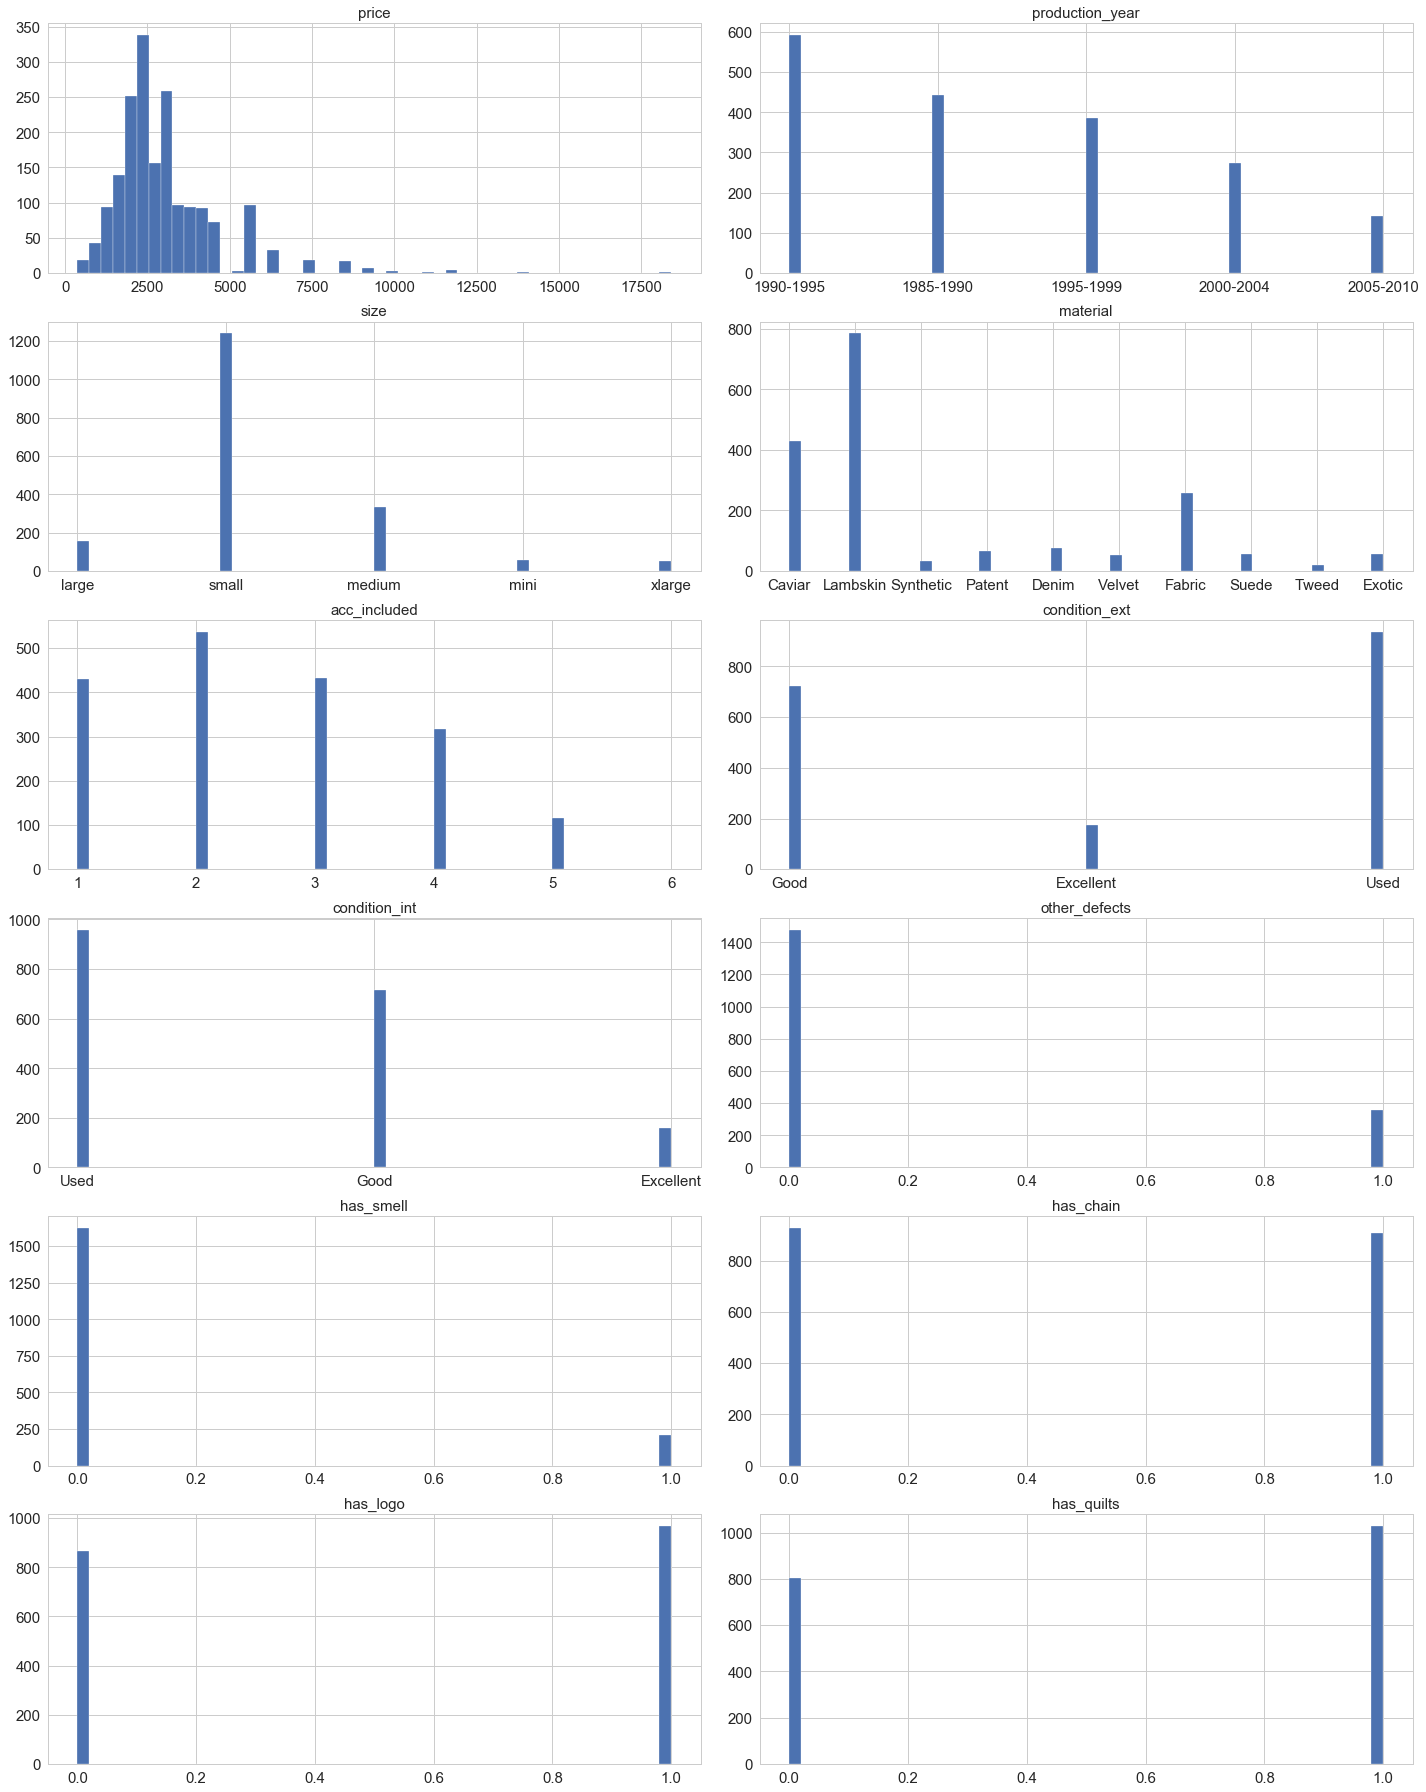

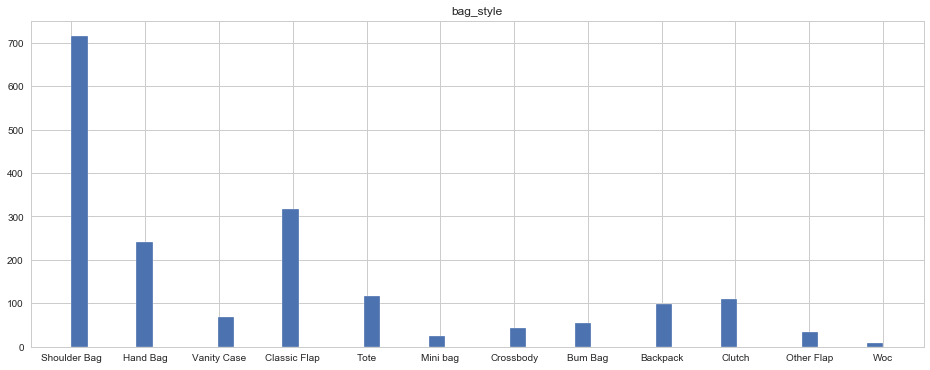

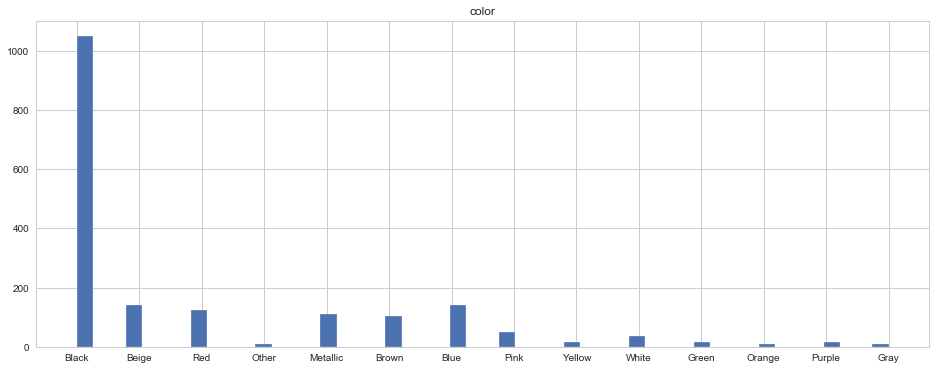

In [215]:
#look at the distribution of the variables


cols = ['price', 'production_year', 'size', 'material', 'acc_included',
       'condition_ext', 'condition_int', 'other_defects', 'has_smell',
       'has_chain', 'has_logo', 'has_quilts']

fig, axes = plt.subplots(6,2, figsize=(20,25))

for i in range(12):
    ax = axes[i//2][i%2]
    ax.hist(df[cols[i]],bins=50)
    ax.set_title(cols[i], fontsize=15)
    #ax.xaxis.set_tick_params(labelsize=15)
    ax.tick_params(labelsize=15) #- changes fontsize of both axes

plt.tight_layout()    
    
fig = plt.figure(figsize=(16, 6))
x = df['bag_style']
plt.title('bag_style')
_ = plt.hist(x, bins=50)   
    
fig = plt.figure(figsize=(16, 6))
x = df['color']
plt.title('color')
n = plt.hist(x, bins=50) 

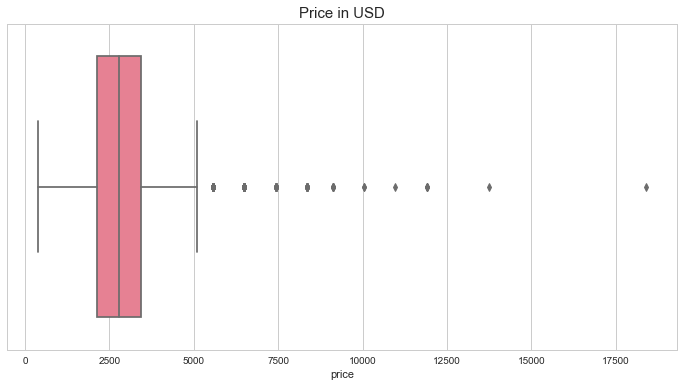

In [217]:
plt.figure(figsize=(12,6))
plt.title("Price in USD",fontsize=15)
g = sns.boxplot(x=df['price'], data=df, palette='husl',)

In [228]:
df.price.describe()


count     1834.000000
mean      3019.997274
std       1585.453029
min        370.000000
25%       2120.000000
50%       2771.000000
75%       3422.000000
max      18414.000000
Name: price, dtype: float64

In [226]:
df.price.median()

2771.0

The distribution of price is skewed to the right - not that dramatic, but since we're not interested anyway in bags above 6000 USD, we can remove these outliers.

In [42]:
df=df.loc[(df.price<6000)]
df.price.describe()

count    1751.000000
mean     2787.418047
std      1122.651177
min       370.000000
25%      1841.000000
50%      2492.000000
75%      3422.000000
max      5561.000000
Name: price, dtype: float64

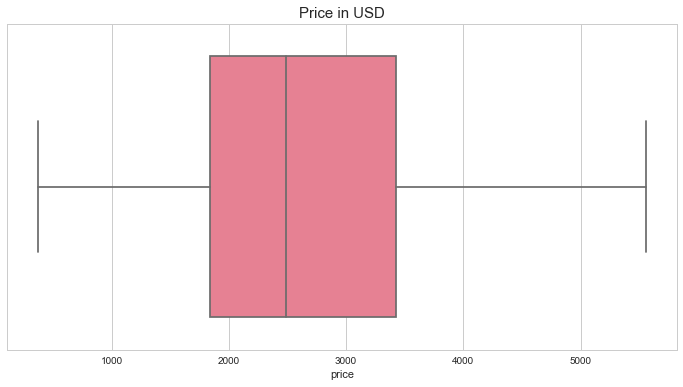

In [230]:
plt.figure(figsize=(12,6))
plt.title("Price in USD",fontsize=15)
g = sns.boxplot(x=df['price'], data=df, palette='husl',)
#g.set_xlabel("Price in USD")

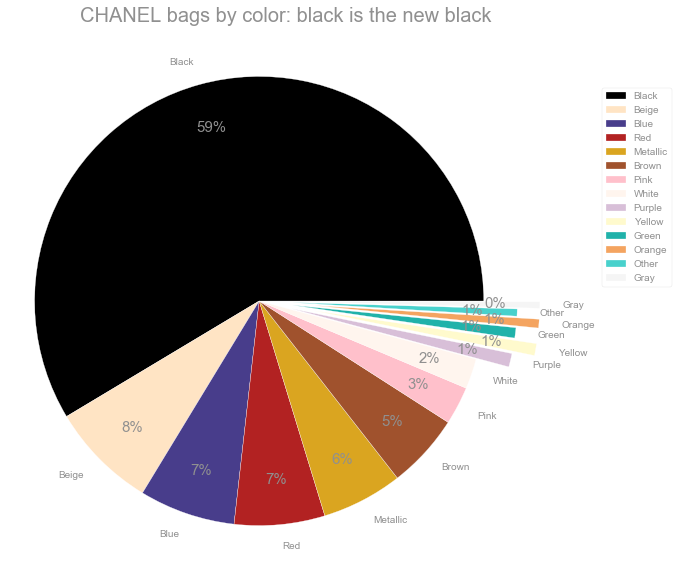

In [283]:
#formatting the chart to make it more esthetically pleasing
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize'] = [10, 10]
# see all X11 color names on https://en.wikipedia.org/wiki/X11_color_names
color_palette_list = ['Black', '#FFE4C4', '#483D8B', '#B22222', '#DAA520',
                      '#A0522D', '#FFC0CB', '#FFF5EE','#D8BFD8', '#FFFACD',
                      '#20B2AA', '#F4A460', '#48D1CC', '#F5F5F5']

percentages = df.groupby('color')['color'].count().sort_values(ascending=False)
labels = percentages.index

explode=(0,0,0,0,0,0,0,0,0.15,0.25,0.15,0.25,0.15,0.25,)
ax.pie(percentages, explode=explode,colors=color_palette_list,autopct='%1.0f%%',
       shadow=False, startangle=0,pctdistance=0.8,labeldistance=1.1, labels=labels)
ax.axis('equal')
ax.set_title("CHANEL bags by color: black is the new black", fontsize=20)
#formatting the legend
ax.legend(frameon=True, bbox_to_anchor=(1.2,0.9))

### 3.2 relationship between features and *price*

To get a first idea of how features impact the price of a bag, we can plot some of these features in function of the price

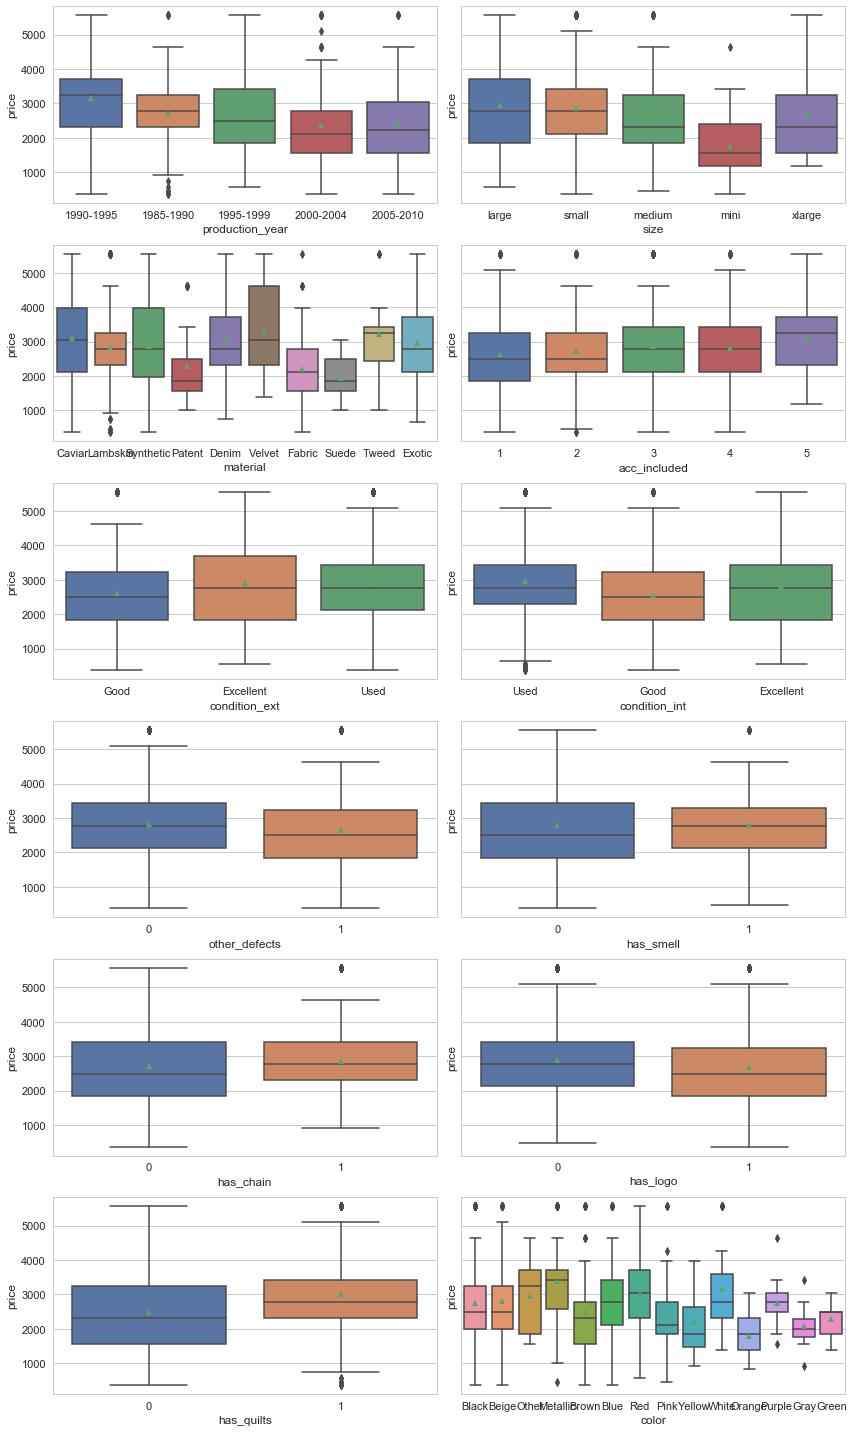

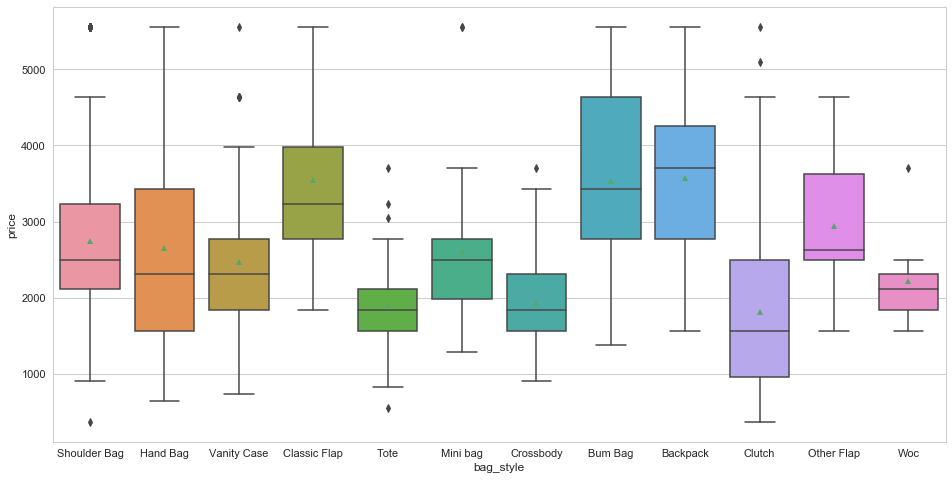

In [354]:
df=df.loc[(df.acc_included<6)]

fig, axes = plt.subplots(6,2, figsize=(12,20), sharey=True)
for xcol, ax in zip(['production_year', 'size', 'material', 'acc_included',
                     'condition_ext', 'condition_int', 'other_defects', 'has_smell',
                     'has_chain', 'has_logo', 'has_quilts','color'], axes.flatten()):
    sns.boxplot(xcol, 'price', data=df, ax=ax,showmeans=True)       
plt.tight_layout()

fig = plt.figure(figsize=(16, 8))
sns.boxplot('bag_style', 'price', data=df,showmeans=True)

In [65]:
sizep = df.groupby(['size']).price.mean()
print(sizep)
print('\n')
yearp = df.groupby(['production_year']).price.mean()
print(yearp)
print('\n')
matp = df.groupby(['material']).price.mean()
print(matp)
print('\n')
accp = df.groupby(['acc_included']).price.mean()
print(accp)
print('\n')
extp = df.groupby(['condition_ext']).price.mean()
print(extp)
print('\n')
haschainquilt1 = (df.loc[(df.has_chain==1)&(df.has_quilts==1)]).price.mean()
haschainquilt0 = (df.loc[(df.has_chain==0)&(df.has_quilts==0)]).price.mean()
print('mean price of quilted and has chains: {}'.format(haschainquilt1))
print("mean price of doesn't have quilts and chains: {}".format(haschainquilt0))
print('\n')
isblack = (df.loc[(df.color=='Black')]).price.mean()
isred = (df.loc[(df.color=='Red')]).price.mean()
isyelorgreen = (df.loc[(df.color=='Yellow')|(df.color=='Orange')|(df.color=='Green')]).price.mean()
print('mean price of black: {}'.format(isblack))
print("mean price of red: {}".format(isred))
print("mean price of yellow, orange or green: {}".format(isyelorgreen))
print('\n')
isflap = (df.loc[(df.bag_style=='Classic Flap')]).price.mean()
istote = (df.loc[(df.bag_style=='Tote')]).price.mean()
isbumback = (df.loc[(df.bag_style=='Bum Bag')|(df.bag_style=='Backpack')]).price.mean()
print('mean price of a classic flap: {}'.format(isflap))
print("mean price of a tote: {}".format(istote))
print("mean price of a bum bag or backpack: {}".format(isbumback))
print('\n')
isclcavblackflap = (df.loc[(df.bag_style=='Classic Flap')&(df.color=='Black')&(df.material=='Caviar')]).price.mean()
print('mean price of a black caviar classic flap: {}'.format(isclcavblackflap))

size
large     2940.897959
medium    2616.948718
mini      1767.072727
small     2863.773569
xlarge    2706.469388
Name: price, dtype: float64


production_year
1985-1990    2731.041379
1990-1995    3170.804659
1995-1999    2691.635328
2000-2004    2378.716418
2005-2010    2454.654676
Name: price, dtype: float64


material
Caviar       3114.443662
Denim        3034.854167
Exotic       2969.846154
Fabric       2195.599222
Lambskin     2833.988189
Patent       2276.107143
Suede        1947.052632
Synthetic    2880.125000
Tweed        3230.187500
Velvet       3285.600000
Name: price, dtype: float64


acc_included
1    2647.942029
2    2735.961464
3    2868.868486
4    2820.257525
5    3161.600000
6    1562.000000
Name: price, dtype: float64


condition_ext
Excellent    2916.928994
Good         2628.627143
Used         2888.626984
Name: price, dtype: float64


mean price of quilted and has chains: 2950.7011952191233
mean price of doesn't have quilts and chains: 2279.0073349633253


mean pr

In [311]:
# putting the clean data in a new csv file
df.to_csv('AmoreChanel_clean2.csv')

# 4. Final steps before modelling

In order to prepare the dataset to merge with the other data we make a few adjustments to make the it uniform

In [4]:
#reading in the clean dataset
df = pd.read_csv('AmoreChanel_clean2.csv', index_col="index",header=0)
df.head()

,price,production_year,size,color,material,acc_included,condition_ext,condition_int,other_defects,has_smell,has_chain,has_logo,has_quilts,bag_style
index,,,,,,,,,,,,,,
0,2771,1990-1995,large,Black,Caviar,4,Good,Used,0,0,1,1,1,Shoulder Bag
1,3050,1985-1990,small,Beige,Lambskin,2,Good,Good,0,0,1,0,1,Hand Bag
3,911,1995-1999,small,Black,Lambskin,3,Excellent,Excellent,0,0,0,0,1,Vanity Case
5,2771,1990-1995,medium,Black,Caviar,1,Used,Used,0,1,1,0,1,Shoulder Bag
6,3236,1990-1995,small,Black,Lambskin,1,Used,Used,0,0,0,0,1,Classic Flap


In [5]:
#2) converting buckets for production year
def year_convert(row):
    if row.production_year == '1985-1990':
        return '1980s'
    elif row.production_year == '1995-1999':
        return '1990s'       
    else:
        return '2000-2010' 
   
df['production_year'] = df.apply(year_convert,axis='columns')

In [7]:
df['color'] = df['color'].str.lower()
df.head(10)

,price,production_year,size,color,material,acc_included,condition_ext,condition_int,other_defects,has_smell,has_chain,has_logo,has_quilts,bag_style
index,,,,,,,,,,,,,,
0,2771,2000-2010,large,black,Caviar,4,Good,Used,0,0,1,1,1,Shoulder Bag
1,3050,1980s,small,beige,Lambskin,2,Good,Good,0,0,1,0,1,Hand Bag
3,911,1990s,small,black,Lambskin,3,Excellent,Excellent,0,0,0,0,1,Vanity Case
5,2771,2000-2010,medium,black,Caviar,1,Used,Used,0,1,1,0,1,Shoulder Bag
6,3236,2000-2010,small,black,Lambskin,1,Used,Used,0,0,0,0,1,Classic Flap
7,3422,2000-2010,large,other,Lambskin,3,Good,Good,0,1,0,0,1,Classic Flap
8,742,2000-2010,small,black,Lambskin,2,Good,Good,0,0,0,1,1,Hand Bag
9,1562,2000-2010,medium,black,Caviar,2,Good,Good,0,0,1,1,1,Tote
10,3701,1980s,small,metallic,Lambskin,1,Good,Good,0,0,1,1,1,Mini bag


In [8]:
# fix material to be uniform with other datasets
def material_convert(row):
    if row.material == 'Denim' or row.material == 'Velvet':
        return 'fabric'      
    else:
        return row.material 
   
df['material'] = df.apply(material_convert,axis='columns')
df['material'] = df['material'].str.lower()

In [16]:
df.groupby('material')['material'].count().sort_values(ascending=False)

material
lambskin     762
caviar       426
fabric       349
suede         57
patent        56
exotic        52
synthetic     32
tweed         16
Name: material, dtype: int64

In [17]:
df['condition_ext'] = df['condition_ext'].str.lower()
df.drop(['condition_int'], axis=1, inplace=True)
df.head(5)

,price,production_year,size,color,material,acc_included,condition_ext,other_defects,has_smell,has_chain,has_logo,has_quilts,bag_style
index,,,,,,,,,,,,,
0,2771,2000-2010,large,black,caviar,4,good,0,0,1,1,1,Shoulder Bag
1,3050,1980s,small,beige,lambskin,2,good,0,0,1,0,1,Hand Bag
3,911,1990s,small,black,lambskin,3,excellent,0,0,0,0,1,Vanity Case
5,2771,2000-2010,medium,black,caviar,1,used,0,1,1,0,1,Shoulder Bag
6,3236,2000-2010,small,black,lambskin,1,used,0,0,0,0,1,Classic Flap


In [18]:
df['brand'] = 'Chanel'

In [20]:
df.head(5)

,price,production_year,size,color,material,acc_included,condition_ext,other_defects,has_smell,has_chain,has_logo,has_quilts,bag_style,brand
index,,,,,,,,,,,,,,
0,2771,2000-2010,large,black,caviar,4,good,0,0,1,1,1,Shoulder Bag,Chanel
1,3050,1980s,small,beige,lambskin,2,good,0,0,1,0,1,Hand Bag,Chanel
3,911,1990s,small,black,lambskin,3,excellent,0,0,0,0,1,Vanity Case,Chanel
5,2771,2000-2010,medium,black,caviar,1,used,0,1,1,0,1,Shoulder Bag,Chanel
6,3236,2000-2010,small,black,lambskin,1,used,0,0,0,0,1,Classic Flap,Chanel


In [21]:
# fix bag_style to be uniform with other datasets
def style_convert(row):
    if row.bag_style == 'Classic Flap' or row.bag_style == 'Other Flap':
        return 'flap_bag'
    if row.bag_style == 'Hand Bag':
        return 'hand_bag'    
    if row.bag_style == 'Shoulder Bag':
        return 'shoulder_bag'
    if row.bag_style == 'Vanity Case':
        return 'vanity_case'
    if row.bag_style == 'Mini Bag':
        return 'woc'
    if row.bag_style == 'Bum Bag':
        return 'waist_bag'    
    else:
        return row.bag_style 
   
df['bag_style'] = df.apply(style_convert,axis='columns')
df['bag_style'] = df['bag_style'].str.lower()

df.groupby('bag_style')['bag_style'].count().sort_values(ascending=False)

bag_style
shoulder_bag    693
flap_bag        340
hand_bag        224
tote            117
clutch          107
backpack         80
vanity_case      61
waist_bag        53
crossbody        43
mini bag         23
woc               9
Name: bag_style, dtype: int64

In [22]:
# putting the clean data in a new csv file
df.to_csv('AmoreChanel_clean_mergeready.csv')